In [1]:
import pandas as pd

df_partidos =pd.read_csv('partidos_cebollitas.csv')
df_partidos.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML


In [3]:
#Nueva caracteristica: Diferencia de goles (local - visitante)
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
#Visualizar la nueva caracteristica
df_partidos[['goles_local', 'goles_visitante', 'diferencia_goles']].head(10)

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2
5,3,3,0
6,4,1,3
7,1,2,-1
8,1,5,-4
9,1,4,-3


In [5]:
#Nueva caracteristica: Ratio tiros al arco por porcentaje de posesion
df_partidos['ratio_tiros_arco_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']
df_partidos['ratio_tiros_arco_visitante'] = df_partidos['tiros_arco_visitante'] / df_partidos['posesion_visitante (%)']
#Visualizar la nueva caracteristica
df_partidos[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_arco_local', 
             'tiros_arco_visitante', 'posesion_visitante (%)', 'ratio_tiros_arco_visitante']].head(10)

,tiros_arco_local,posesion_local (%),ratio_tiros_arco_local,tiros_arco_visitante,posesion_visitante (%),ratio_tiros_arco_visitante
0,12,54,0.222222,6,46,0.130435
1,12,60,0.200000,3,40,0.075000
2,10,55,0.181818,7,45,0.155556
3,3,57,0.052632,3,43,0.069767
4,7,52,0.134615,12,48,0.250000
5,8,60,0.133333,11,40,0.275000
6,4,49,0.081633,8,51,0.156863
7,5,56,0.089286,5,44,0.113636
8,9,60,0.150000,9,40,0.225000
9,10,43,0.232558,7,57,0.122807


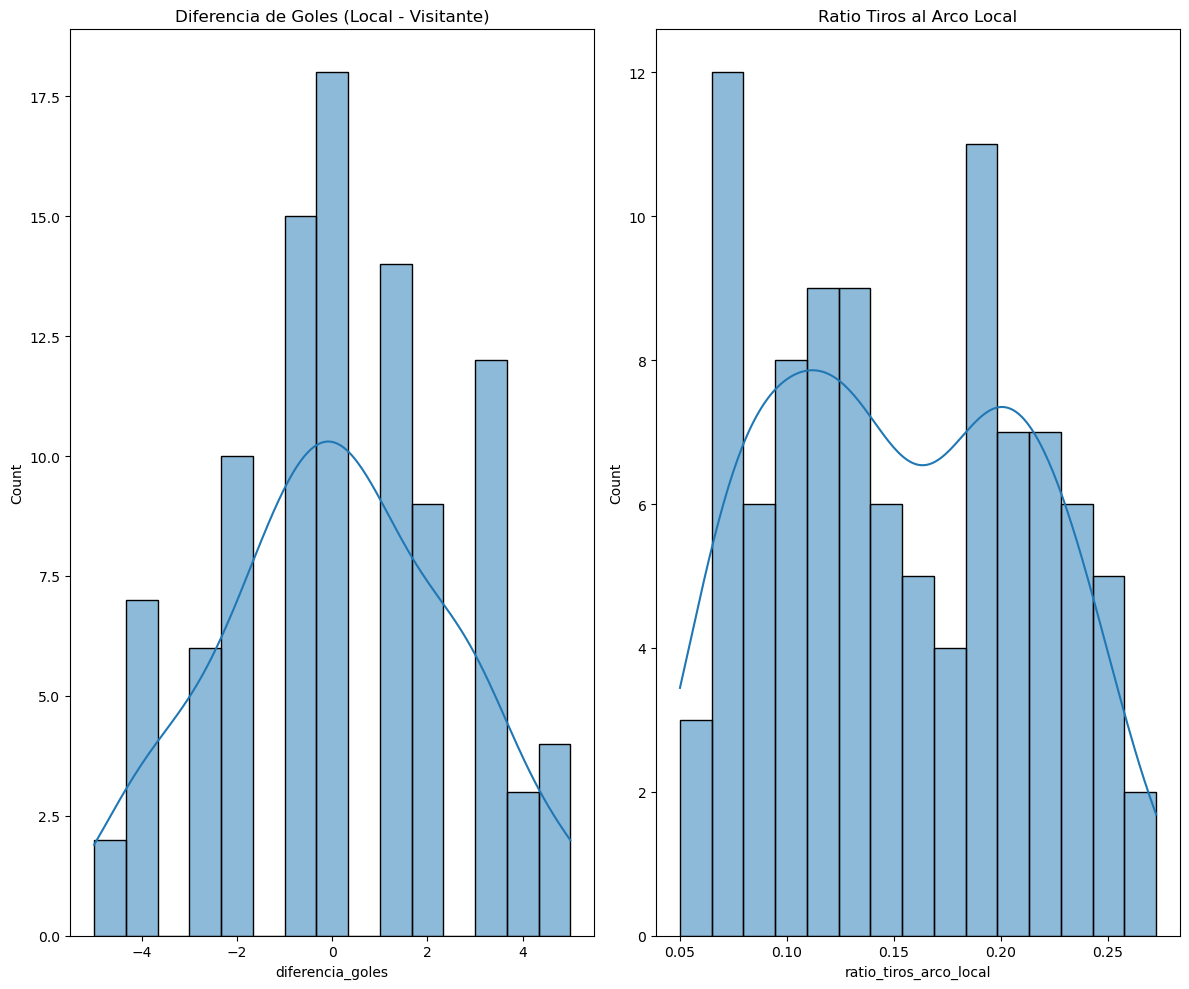

In [7]:
#Histograma de las variables nuevas calculadas
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
#Visualizar diferencia de goles
sns.histplot(df_partidos['diferencia_goles'], bins=15, kde=True, ax=ax[0])
ax[0].set_title('Diferencia de Goles (Local - Visitante)')
#Visualizar ratio tiros al arco
sns.histplot(df_partidos['ratio_tiros_arco_local'], bins=15, kde=True, ax=ax[1])
ax[1].set_title('Ratio Tiros al Arco Local')
plt.tight_layout()

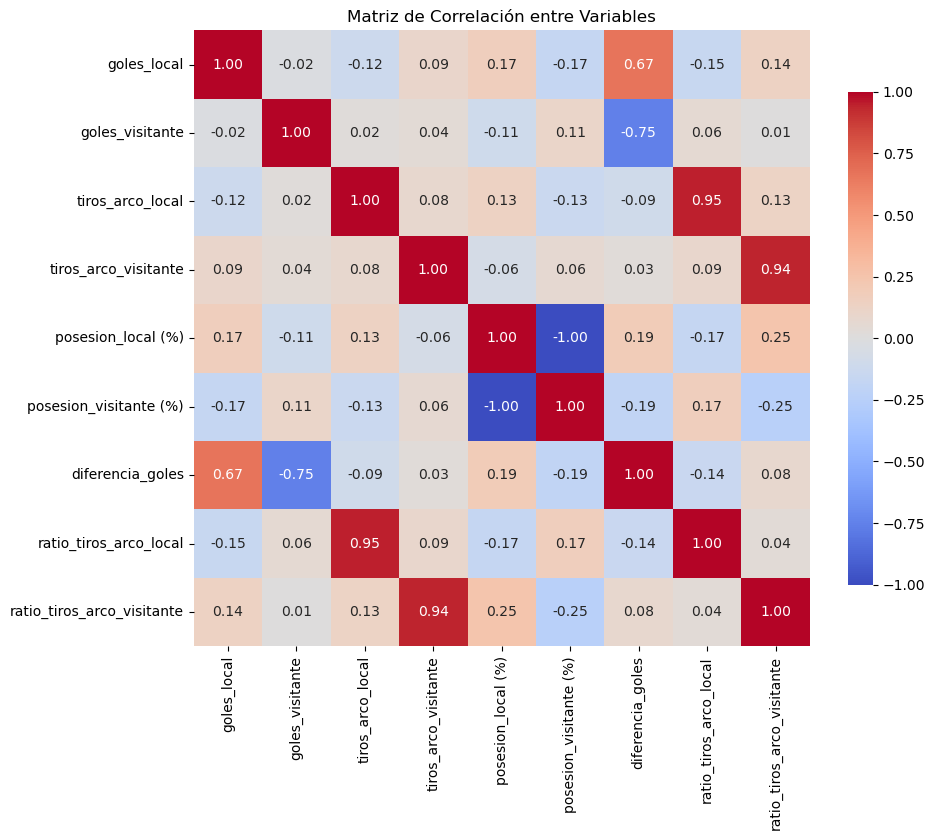

In [8]:
#Analisis de correlacion entre variables originales y nuevas
corr_vars = df_partidos[['goles_local', 'goles_visitante', 'tiros_arco_local',
                         'tiros_arco_visitante', 'posesion_local (%)',
                         'posesion_visitante (%)', 'diferencia_goles',
                         'ratio_tiros_arco_local', 'ratio_tiros_arco_visitante']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_vars, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación entre Variables')
plt.show()